In [9]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("./AB_NYC_2019.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
df.value_counts() #well, this didn't tell me a whole lot

id        name                                               host_id    host_name        neighbourhood_group  neighbourhood       latitude  longitude  room_type        price  minimum_nights  number_of_reviews  last_review  reviews_per_month  calculated_host_listings_count  availability_365
2539      Clean & quiet apt home by the park                 2787       John             Brooklyn             Kensington          40.64749  -73.97237  Private room     149    1               9                  2018-10-19   0.21               6                               365                 1
24082591  Haven In The Heights - Huge Manhattan 2BR 2 Bath!  44303500   Bruce & Suzanne  Manhattan            Washington Heights  40.84634  -73.93861  Entire home/apt  275    2               7                  2019-05-12   0.52               2                               0                   1
24083340  Your Dream 1 bed Apartment in the heart of SoHo    13460416   Jeremie          Manhattan            Little 

## Questions I'd like to answer here:

### 1) Where are the most expensive Airbnb rentals located?
My gut feelings is that price probably correlates highly with location (i.e. Manhattan will be more expensive than Brooklyn, which will be more expensive than Queens, etc.)...let's see if we can confirm that. Also, are there any obvious factors that elevate a rental above the average for its neighborhood? Could be something like near the water, has a good view of the city, near public transportation, etc.

### 2) Can we find evidence of Airbnbs "taking over" neighborhoods?
Airbnb was originally meant to help average people make a little extra money by renting out their extra spaces...extra rooms, vacation homes, etc. These days, though, there has been a lot of attention around the emergence of "Airbnb cities," where landlords have figured out that they can make more money by buying up properties to rent out indefinitely as short-term rentals rather than renting as long-term housing, and that's driven the cost of rents and mortgages up. NYC is often mentioned as one such city, so let's see if we can find some evidence of that happening: cases of the same landlord (host_id) having multiple properties, and especially multiple properties in the same neighborhoods at prices much higher than local rent. If we can find some neighborhoods to check out, local rent could be pretty easily sourced from Zillow or somewhere similar.

### 3) What is the most profitable Airbnb strategy for a landlord in NYC?
This data set doesn't directly tell us how many times a given Airbnb was rented in the past month, but maybe we can make a reasonable guess about occupancy using some other fields. If so, is it more profitable on average for an Airbnb host to have a more expensive unit that rents less frequently or a middle-of-the-market unit that is often rented out? What's the sweet spot for NYC?

### Bonus: Can we train a model to predict nightly rental price of a given Airbnb after some data cleaning?

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

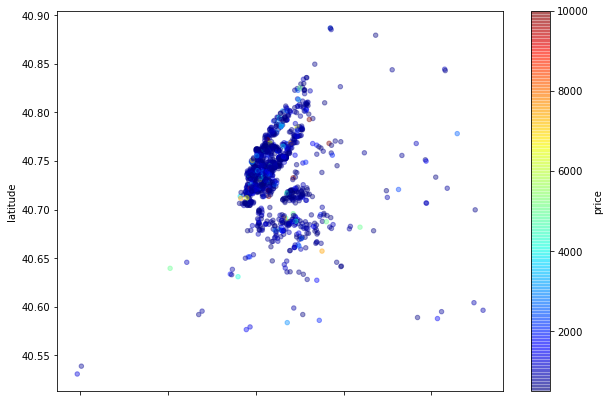

In [62]:
df[df['price'] >= 500].plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10,7), c='price', cmap=plt.get_cmap("jet"), colorbar=True)

In [61]:
df.groupby('host_id').count()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,,,,,
2438,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2571,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2787,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2845,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2868,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274273284,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
274298453,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
274307600,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1


In [21]:
df.shape

(48895, 16)

In [83]:
# let's do some data cleaning first

# checking Airbnb on 05/11/21, there are 3 listings for $20 or less. Anything below that doesn't seem like accurate data, so let's drop
cleaned = df[df['price'] > 30]
cleaned = cleaned[cleaned['price'] < 600]

cleaned.dropna(subset=['price', 'longitude', 'latitude'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [74]:
cleaned.shape

(47949, 16)

In [69]:
cleaned[cleaned['price'] > 600]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
345,89427,The Brooklyn Waverly,116599,Sahr,Brooklyn,Clinton Hill,40.68613,-73.96536,Entire home/apt,650,5,0,NaN,NaN,3,365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
653,248871,4 BEDROOM -2BATHRM WEST VILLAGE DUPLEX TOWNHOUSE,605463,West Village,Manhattan,West Village,40.73066,-74.00287,Entire home/apt,700,3,131,2019-06-24,1.40,4,296
662,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,2019-05-23,1.15,1,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,NaN,NaN,1,349
48535,36311055,"Stunning & Stylish Brooklyn Luxury, near Train",245712163,Urvashi,Brooklyn,Bedford-Stuyvesant,40.68245,-73.93417,Entire home/apt,1749,1,0,NaN,NaN,1,303
48697,36388720,HUGE LUXURY CONDO – INCREDIBLE WATER VIEWS,273619215,Layla,Manhattan,Upper West Side,40.77665,-73.98867,Entire home/apt,750,4,0,NaN,NaN,1,174
48757,36419574,Luxury & Spacious 1500 ft² MANHATTAN Townhouse,11454384,Ellen,Manhattan,Tribeca,40.71815,-74.01145,Entire home/apt,700,3,0,NaN,NaN,1,37


<AxesSubplot:>

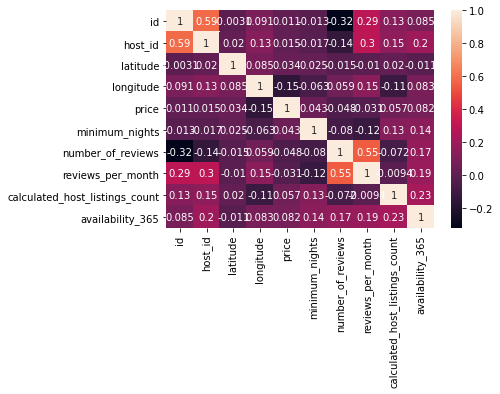

In [75]:
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=True)

In [58]:
cleaned[cleaned.isna().any(axis=1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [138]:
BBox = ((cleaned.longitude.min(), cleaned.longitude.max(), cleaned.latitude.min(), cleaned.latitude.max()))

BBox

(-74.24442, -73.71299, 40.49979, 40.91306)

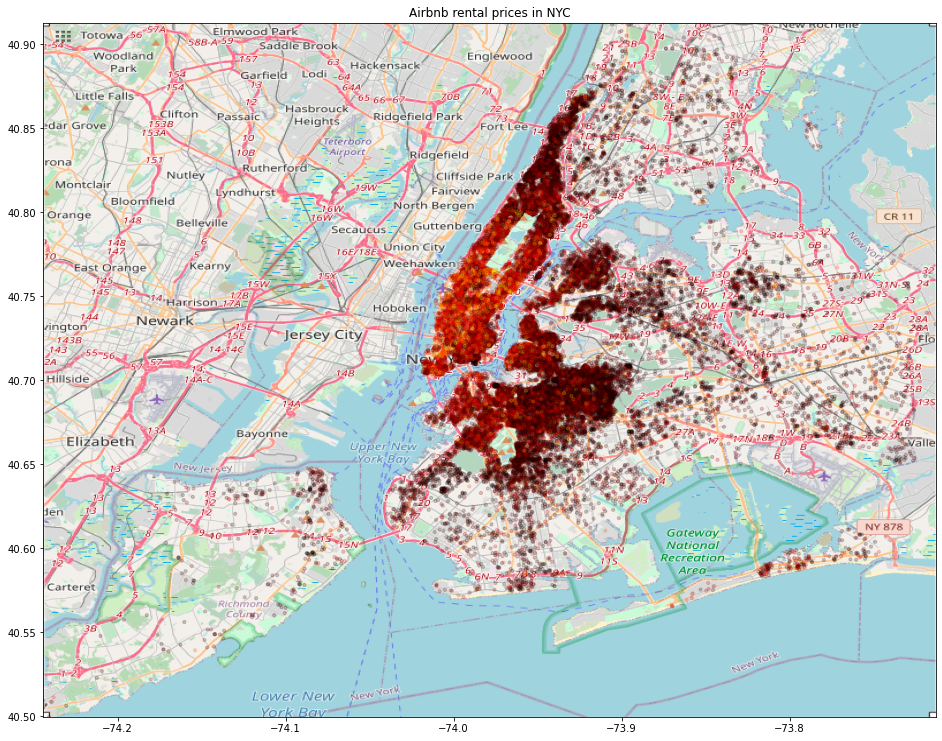

In [161]:
nyc_map = plt.imread("./nyc_map.png")

fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(cleaned.longitude, cleaned.latitude, zorder=1, alpha= 0.2, c=cleaned.price, s=10, cmap="hot")
ax.set_title('Airbnb rental prices in NYC')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(nyc_map, zorder=0, extent=BBox, aspect='equal')

#### So far it looks like our hypothesis was correct: location has a large impact on prices.
But this shouldn't be a surprise to anyone--of course Manhattan is more expensive than Queens! Let's get a zoomed-in look around locations of interest and see if we can discern anything further.

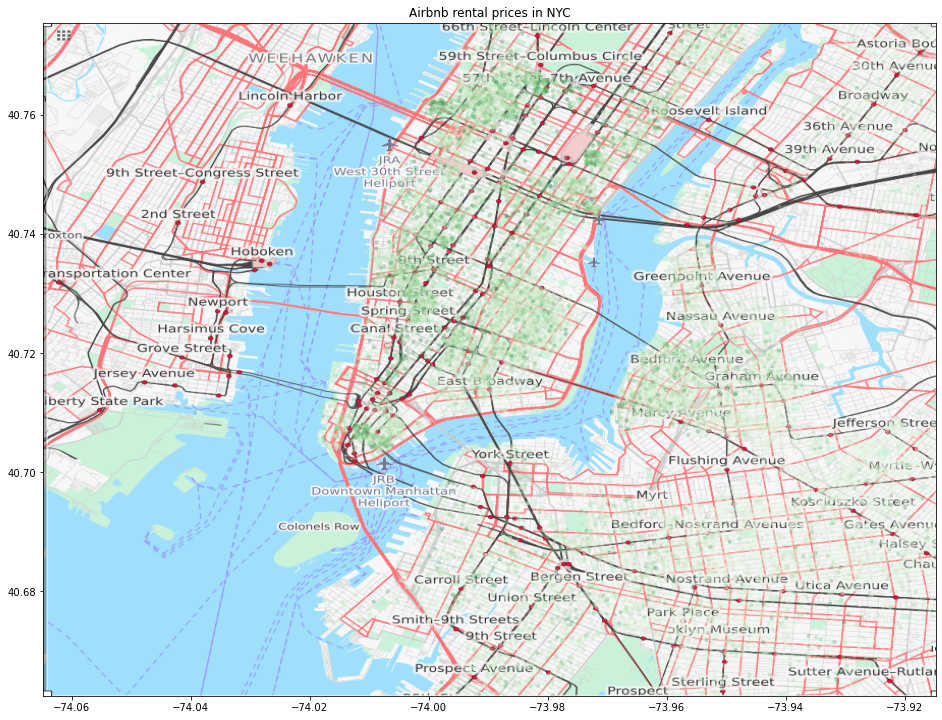

In [168]:
BBox_zoomed = ((-74.0648, -73.9148, 40.6624, 40.7755))
cleaned_zoomed = cleaned[cleaned['longitude'].between(BBox_zoomed[0],BBox_zoomed[1]) & cleaned['latitude'].between(BBox_zoomed[2],BBox_zoomed[3])]


nyc_map_transport = plt.imread("./nyc_map_transport.png")

fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(cleaned_zoomed.longitude, cleaned_zoomed.latitude, zorder=1, alpha= 0.2, c=cleaned_zoomed.price, s=10, cmap="Greens")
ax.set_title('Airbnb rental prices in NYC')
ax.set_xlim(BBox_zoomed[0],BBox_zoomed[1])
ax.set_ylim(BBox_zoomed[2],BBox_zoomed[3])
ax.imshow(nyc_map_transport, zorder=0, extent=BBox_zoomed, aspect='equal')

#### Answer to #1:
Here we've changed the color map for our plots to a green scale so that we can easily see the red dots that represent subway stations on the underlying map, with lighter greens representing lower prices and vice versa. This is interesting...I had imagined that being near the water might lead to higher rental prices (because the view is better), and we can maybe see some evidence of this near Bedford Avenue / Graham Avenue east of Manhattan in West Queens, but that doesn't seem to hold up if we look south of Manhattan to Northern Brooklyn. It seems like there are clusters in main centers of activity that have really high prices, and there's definitely some correlation with transportation--in particular, ease of getting to central Manhattan. Notice how thin the rentals are between York Street and Flushing Avenue, for example.

Though not explicitly labeled on this map, we can easily see clusters of high prices cropping up around tourist attractions--the Brooklyn Bridge, Empire State Building, and Central Park all have some of the highest concentrations of high prices in NYC. It's also interesting to see at this more granular level that apart from the main hotspots around tourist attractions, even in places with generally high prices (e.g. Manhattan), price levels are somewhat spread out and not clearly all on the same few blocks or all in one neighborhood. This also makes sense, since people renting Airbnbs in NYC are probably tourists and aren't necessarily planning to spend a lot of time in the neighborhood they happen to be staying at--they're likely to place more value on the quality of the rental unit and its location as it relates to transportation, and not necessarily how nice all the other units in the same neighborhood are the way that a homebuyer might.

There might be an opportunity for aspiring Airbnb real estate moguls here--if we were buying property in NYC specifically to rent it out on Airbnb, it might be to our advantage to look for nicer / newly renovated units in a (comparatively) cheaper neighborhood that still has decent transportation options, instead of spending the same amount of money on a worse unit in a more expensive neighborhood. This seems especially obvious if we compare East Manhattan and West Queens, where Airbnb rental prices are similar but property sale prices are very different: compare a median of \$2,970,000.00 for the Theater District in Manhattan vs. 1,150,000.00 in Ditmars-Steinway, Queens (https://www.timeout.com/newyork/news/these-are-the-new-most-expensive-neighborhoods-in-nyc-010621). We'll explore this idea more later on.